# Exoplanet Detection Part 2



The focus of this notebook is classifying exoplanet stars. We'll be:
*   Preprocessing the dataset for the ML models
*   Implementing different ML architectures to see which one performs best
*   Using data augmentation to improve our models' performance!

In [ ]:

%tensorflow_version 2.x
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv'

from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import  metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize

import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('exoTrain.csv')
df_train.LABEL = df_train.LABEL -1
df_test = pd.read_csv('exoTest.csv')
df_test.LABEL = df_test.LABEL - 1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
--2025-02-18 00:43:52--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262223348 (250M) [application/octet-stream]
Saving to: ‘exoTrain.csv’

exoTrain.csv        100%[===================>] 250.08M   130MB/s    in 1.9s    

2025-02-18 00:43:55 (130 MB/s) - ‘exoTrain.csv’ saved [262223348/262223348]

--2025-02-18 00:43:55--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.20

#Data



In [ ]:
#YOUR CODE HERE
print(len(df_train))
print(len(df_test))
print(df_train.head(5))


5087
570
   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      1    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      1   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      1   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      1   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      1 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42    

## Comparing Flux Curves for Exoplanets vs. Non-Exoplanets

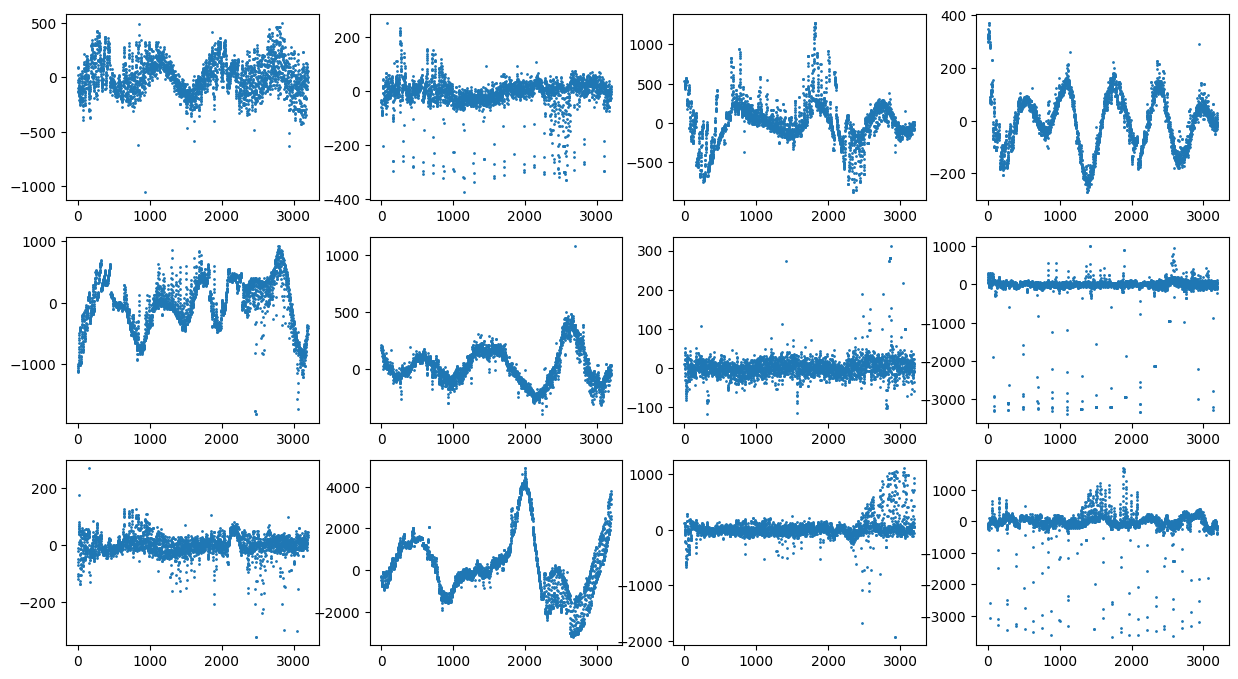

In [ ]:
# samples of exoplanet stars
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),df_train[df_train['LABEL'] == 1].iloc[i,1:],s=1)

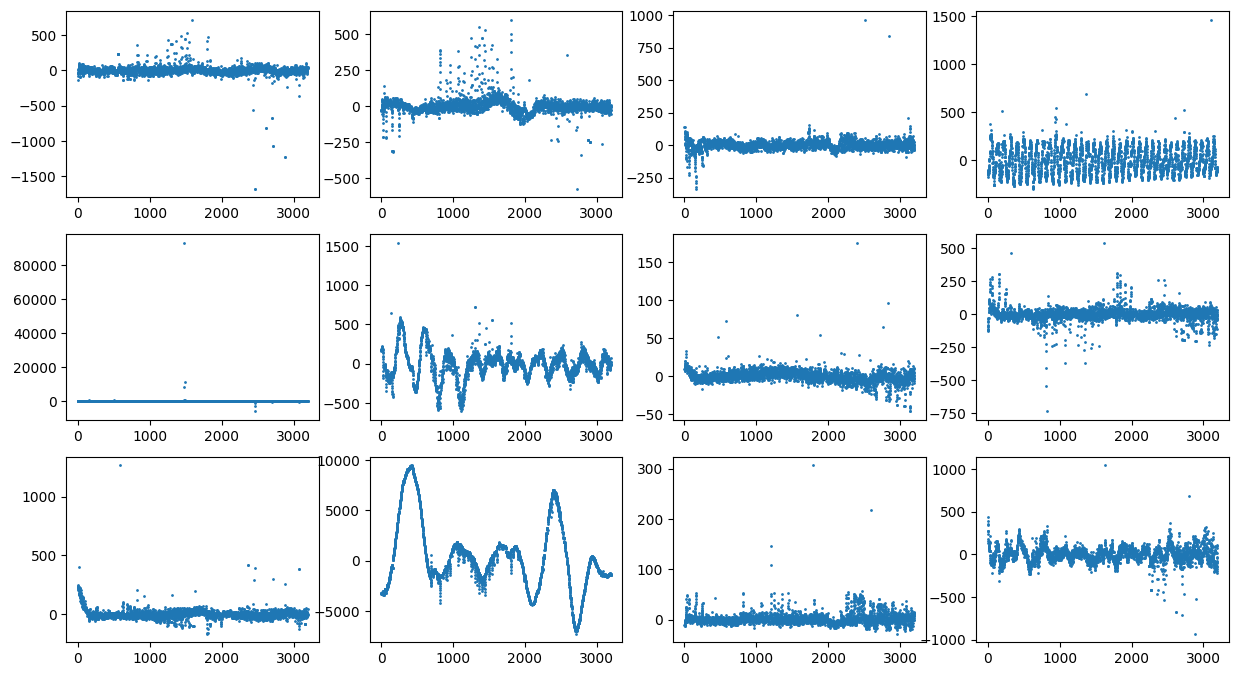

In [ ]:
#samples of non-exoplanet stars
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),df_train[df_train['LABEL']==0].iloc[i,1:],s=1)

##Histograms for Exoplanets vs. Non-Exoplanets


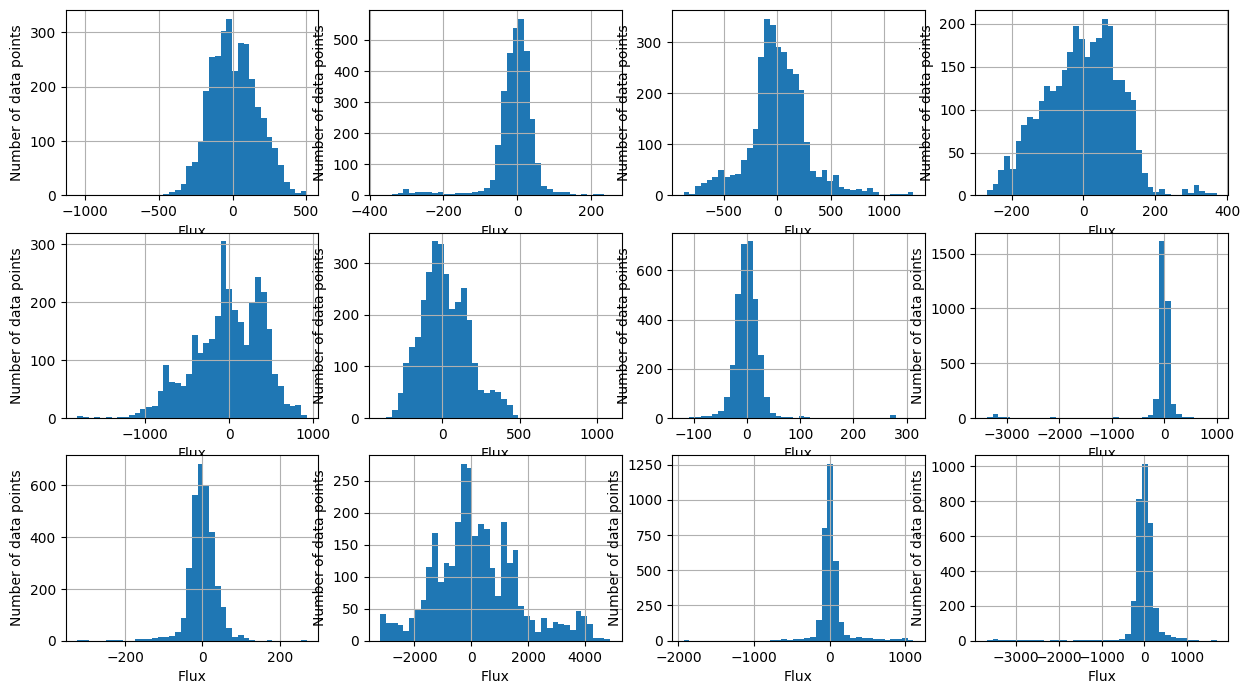

In [ ]:
#histograms of exoplanet stars
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    plt.xlabel("Flux")
    plt.ylabel("Number of data points")
    df_train[df_train['LABEL']==1].iloc[i,1:].hist(bins=40)

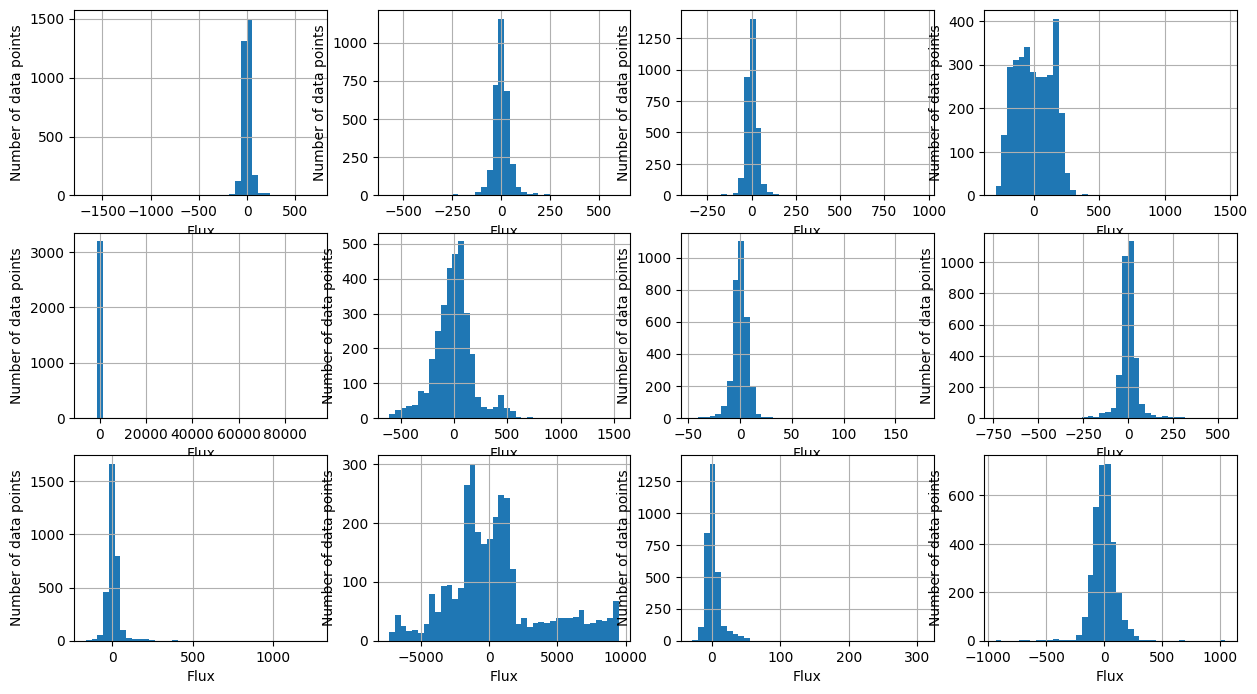

In [ ]:
#histograms of non-exoplanet stars
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    plt.xlabel("Flux")
    plt.ylabel("Number of data points")
    df_train[df_train['LABEL']==0].iloc[i,1:].hist(bins=40)

## Data Distribution


In [ ]:

labels1 = df_train.LABEL
labels2 = df_test.LABEL
train_non_exo = df_train.loc[labels1==0]
train_exo = df_train.loc[labels1==1]
print("train non exoplanets:", len(train_non_exo))
print("train exoplanets:", len(train_exo))

test_non_exo = df_test.loc[labels2==0]
test_exo = df_test.loc[labels2==1]
print("test non exoplanets:", len(test_non_exo))
print("test exoplanets:", len(test_exo))




train non exoplanets: 5050
train exoplanets: 37
test non exoplanets: 565
test exoplanets: 5


In [ ]:

print("df_train percent:", len(train_exo)/ len(df_train))
print( "df_test_percent:" ,len(test_exo)/ len(df_test))




df_train percent: 0.007273442107332416
df_test_percent: 0.008771929824561403


## Classification with KNN



In [ ]:
# helper functions and create train_X, train_y, test_X, test_y

def analyze_results(model, train_X, train_y, test_X, test_y):
    """
    Helper function to help interpret and model performance.

    Args:
    model: estimator instance
    train_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    train_y : array-like of shape (n_samples,)
    Target values for model training.
    test_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.
    test_y : array-like of shape (n_samples,)
    Target values for model testing.

    Returns:
    None
    """
    print("-------------------------------------------")
    print("Model Results")
    print("")
    print("Training:")
    ConfusionMatrixDisplay.from_estimator(model,train_X,train_y)
    plt.show()
    print("Testing:")
    ConfusionMatrixDisplay.from_estimator(model,test_X,test_y)

def reset(train,test):
    train_X = train.drop('LABEL', axis=1)
    train_y = train['LABEL'].values
    test_X = test.drop('LABEL', axis=1)
    test_y = test['LABEL'].values
    return train_X,train_y,test_X,test_y

train_X,train_y,test_X,test_y = reset(df_train, df_test)

In [ ]:
#creates KNN model
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors = n_neighbors)



In [ ]:
# Train the model
model.fit(train_X, train_y)


KNeighborsClassifier()

In [ ]:
# Calculate the predictions and accuracies on train_X and test_X

train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)
print(accuracy_score(train_y, train_predictions))
print(accuracy_score(test_y, test_predictions))




0.9931197169254964
0.9912280701754386


Confusion Matrix for KNN Model

-------------------------------------------
Model Results

Training:


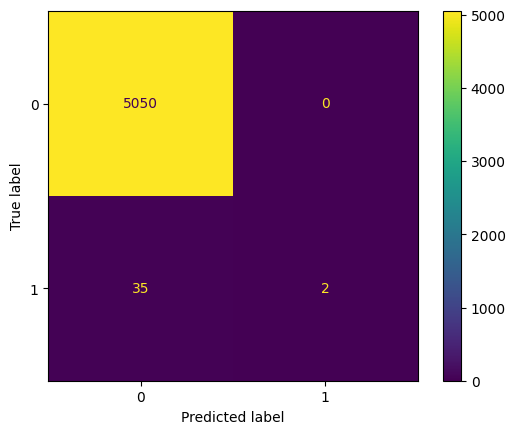

Testing:


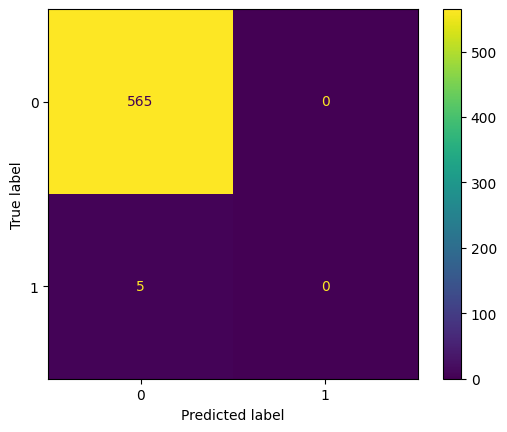

In [ ]:
#Analyze the KNN model

analyze_results(model=model, train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)




## Logistic Regression

In [ ]:


max_iter = 1000

model = LogisticRegression(max_iter=max_iter)


0.9121289561627678
0.6280701754385964
-------------------------------------------
Model Results

Training:


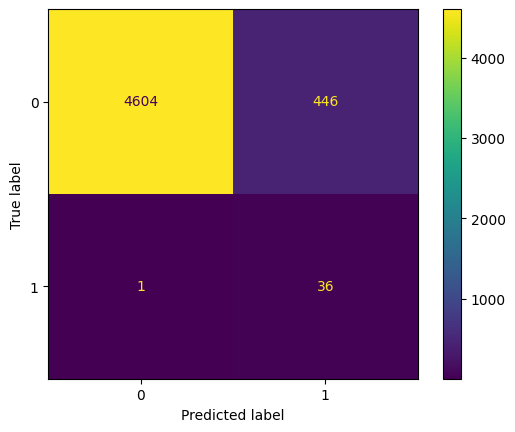

Testing:


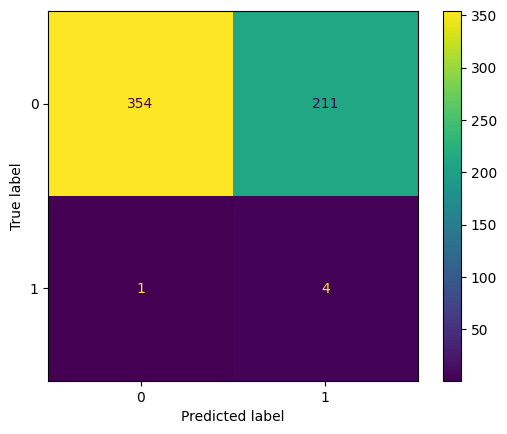

In [ ]:

model.fit(train_X,train_y)
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)
print(accuracy_score(train_y, train_predictions))
print(accuracy_score(test_y, test_predictions))
analyze_results(model=model, train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)


## Decision Trees


1.0
0.9824561403508771
-------------------------------------------
Model Results

Training:


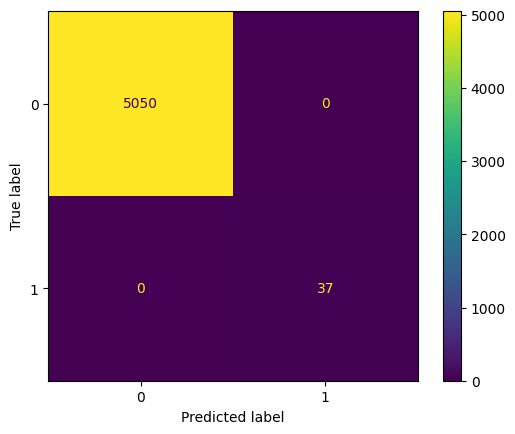

Testing:


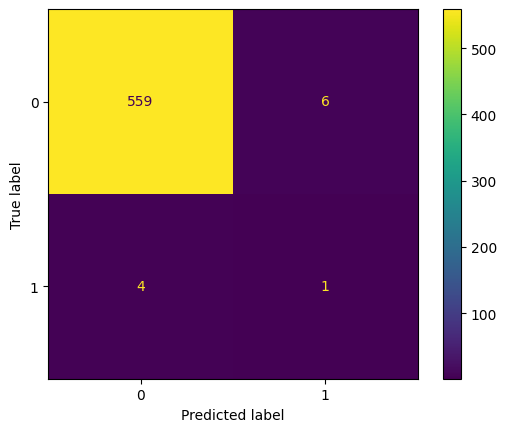

In [ ]:
#YOUR CODE HERE to experiment with creating and importing models!
model = tree.DecisionTreeClassifier()


model.fit(train_X,train_y)

train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)
print(accuracy_score(train_y, train_predictions))
print(accuracy_score(test_y, test_predictions))

analyze_results(model=model, train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)

## Data Augmentation


Data Augmentation to improve model performance. Main problems are that the majority of the data is non-exoplanet data and the values have a lot of variety and a high range.


In [ ]:
#helper functions

def smote(a,b):
    model = SMOTE()
    X,y = model.fit_resample(a, b)
    return X,y

def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

def fourier(df1,df2):
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

def norm(df1,df2):
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

def robust(df1,df2):
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

### Normalization

Normalization means scaling data so all points lie between 0 and 1.


In [ ]:
def norm(train_X, test_X):
    """
    Helper function to normalize inputs train_X and test_X.

    Args:
    train_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    test_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.

    Returns:
    train_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    test_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.
    """
    norm_train_X = normalize(train_X)
    norm_test_X = normalize(test_X)
    return norm_train_X, norm_test_X

In [30]:
fourier_train_X, fourier_test_X = fourier(train_X, test_X)
savgol_train_X, savgol_test_X = savgol(fourier_train_X, fourier_test_X)


norm_train_X, norm_test_X = norm(savgol_train_X,savgol_test_X)
##################

robust_train_X, robust_test_X = robust(norm_train_X, norm_test_X)

### Data Augmentation with SMOTE
SMOTE or Synthetic Minority Oversampling Technique is used to tackle an imbalanced dataset by synthesizing new data to balance out the dataset.

In [31]:
#YOUR CODE HERE
smote_train_X, smote_train_y = smote(robust_train_X,train_y)

In [32]:
aug_train_X, new_X_test_data, aug_train_y, new_y_test_data = train_test_split(smote_train_X, smote_train_y, test_size=0.3)
aug_test_X = np.concatenate((robust_test_X, new_X_test_data), axis=0)
aug_test_y = np.concatenate((test_y, new_y_test_data), axis=0)

In [33]:
# helper functions and variables
def visualize_data(X, y, indicies):
  stars = indicies

  fig = plt.figure(figsize=(24,500))
  x = np.array(range(3197))
  for i in range(0,len(stars)):
      ax = fig.add_subplot(100,5,1+i)
      ax.set_title('Data '+"I:"+str(stars[i])+" Label:"+str(y[stars[i]]))
      ax.scatter(x, X[stars[i],:],s=1)

robust_train_y_with_exoplanet_indicies = train_y.nonzero()[0]
robust_train_y_with_no_exoplanet_indicies = (train_y-1).nonzero()[0]

aug_train_y_with_exoplanet_indicies = aug_train_y.nonzero()[0]
aug_train_y_with_no_exoplanet_indicies = (aug_train_y-1).nonzero()[0]

Orginal, newly modified data with exoplanets:


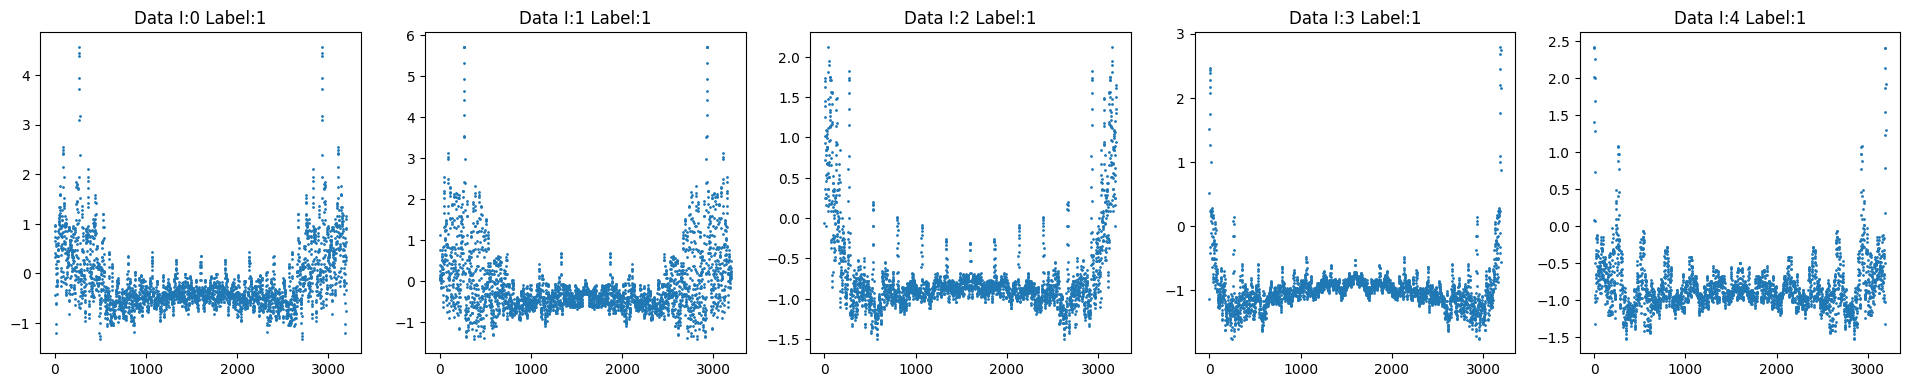

In [34]:
#visualize original, preprocessed data with exoplanets
print("Orginal, newly modified data with exoplanets:")
visualize_data(robust_train_X, train_y, robust_train_y_with_exoplanet_indicies[:5])

Augmented data with Exoplanets:


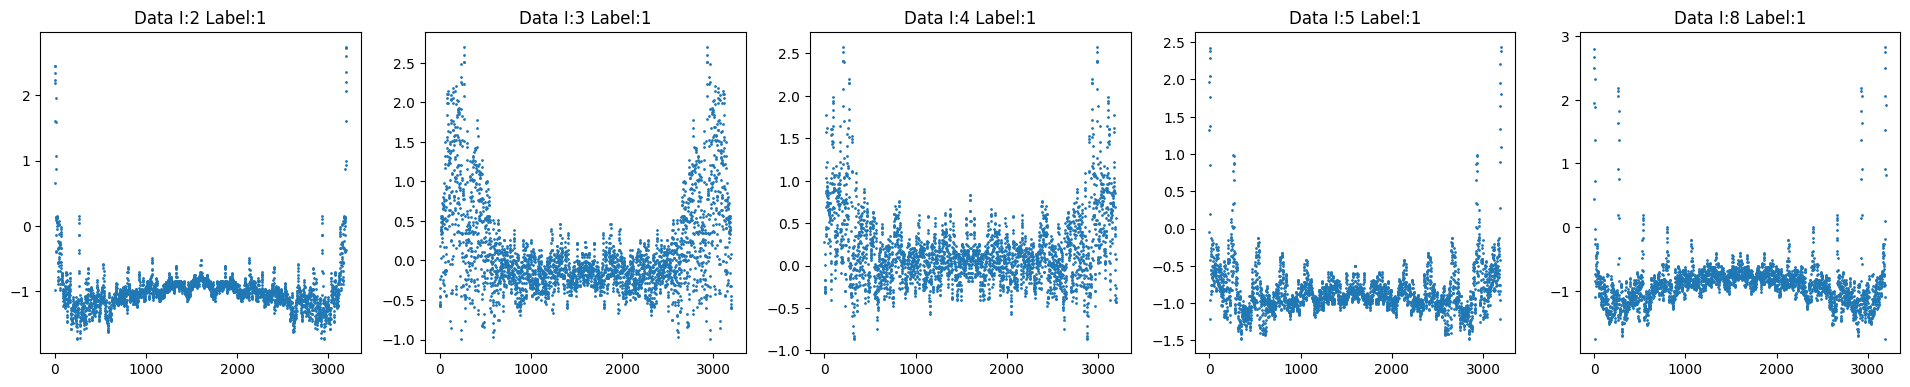

In [35]:
#newly generated data containing exoplanets
print("Augmented data with Exoplanets:")
visualize_data(aug_train_X, aug_train_y, aug_train_y_with_exoplanet_indicies[:5])

Orginal, newly modified data with no exoplanets:


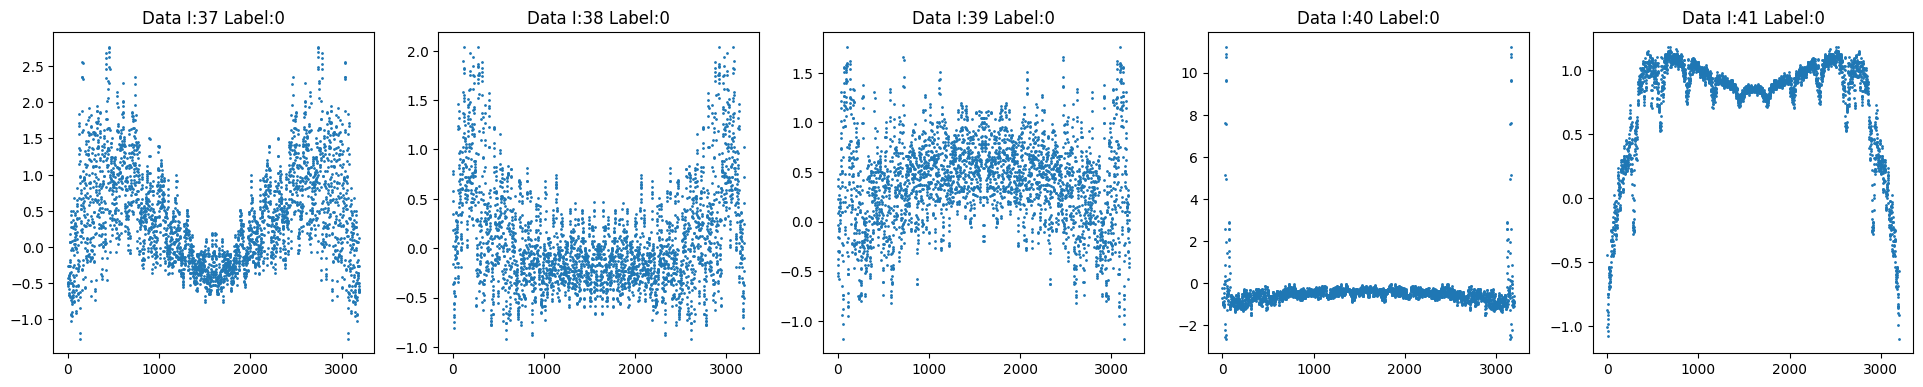

In [36]:
#visualize original, modified data with no Exoplanets
print("Orginal, newly modified data with no exoplanets:")
visualize_data(robust_train_X, train_y, robust_train_y_with_no_exoplanet_indicies[:5])

Augmented data with no Exoplanets:


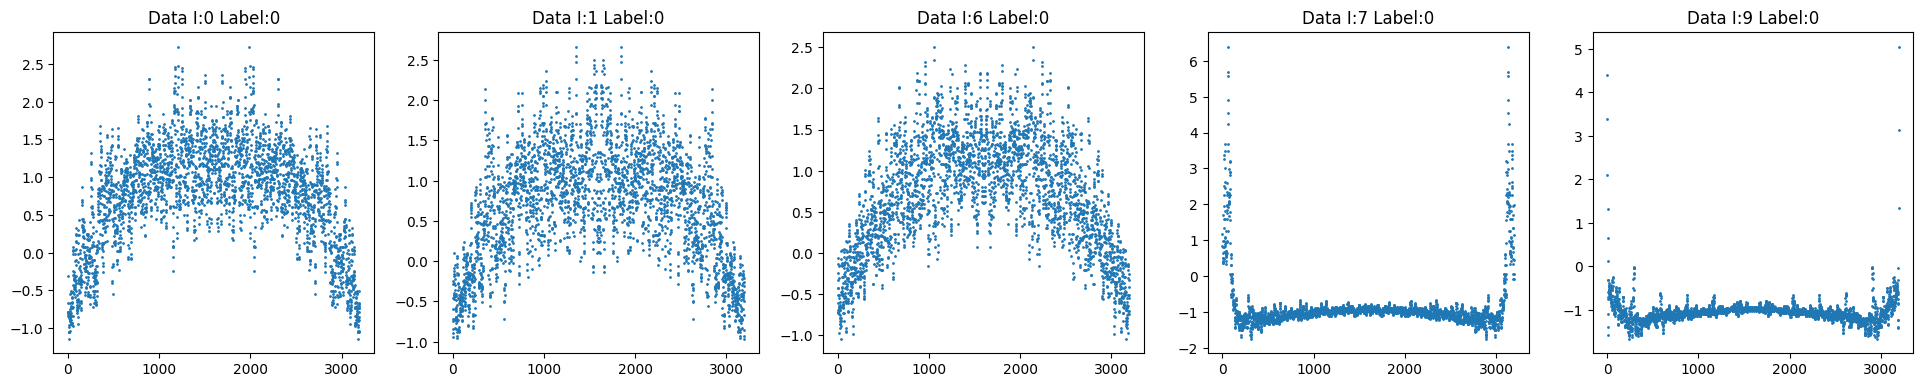

In [37]:
#visualize newly generated data containing no exoplanets
print("Augmented data with no Exoplanets:")
visualize_data(aug_train_X, aug_train_y, aug_train_y_with_no_exoplanet_indicies[:5])

Much more balanced!



In [42]:
print(len(aug_train_y_with_exoplanet_indicies)/len(aug_train_y))


0.499009900990099


Retrain with augmented data

1.0
0.9925
-------------------------------------------
Model Results

Training:


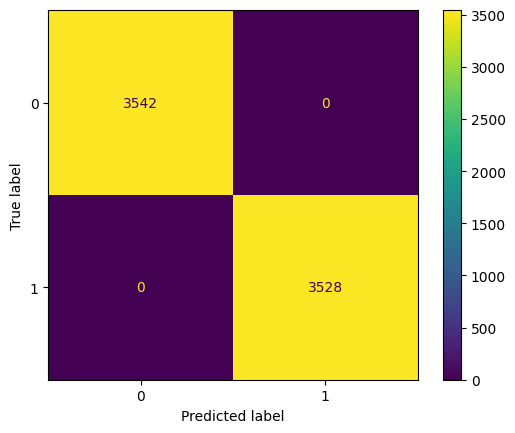

Testing:


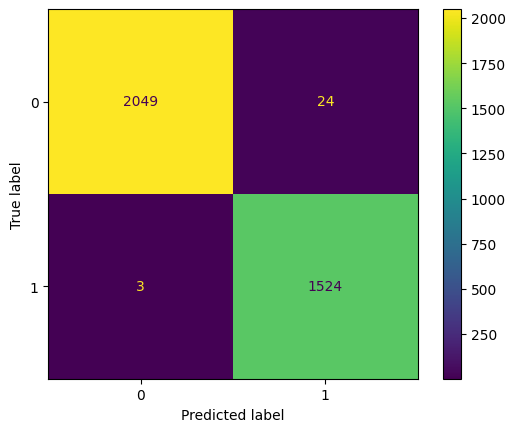

In [45]:
model = tree.DecisionTreeClassifier()




model.fit(aug_train_X,aug_train_y)

train_predictions = model.predict(aug_train_X)
test_predictions = model.predict(aug_test_X)
print(accuracy_score(aug_train_y, train_predictions))
print(accuracy_score(aug_test_y, test_predictions))

analyze_results(model=model, train_X=aug_train_X, train_y=aug_train_y, test_X=aug_test_X, test_y=aug_test_y)